In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
data = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Understanding the data
- Invoice id = identification number bill of sale invoice generated by computer

- Branch = Supercenter Branch has 3 branches identified by A, B and C).

- City = City: Location of supercenters

- Customer type = Type of customers, registered by Socios for customers with a credit card member and Normal for without membership card.

- Gender = Client gender type

- Product line = General groups Item categorization: Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

- Unit Price = Price of each product in $

- Quantity = Number of products purchased by the client

- Tax = 5% tax rate for purchase of the client

- Total = Total price taxes included

- Date = Date of purchase (Record available from January to March)

- Time = Purchase time (10am to 9pm)

- Payment = payment used by the client for the purchase (3 methods are available: cash, credit card and electronic wallet)

- COGS: cost of goods sold

- Gross margin percentage = Gross margin percentage

- Gross income = Gross income

- Rating = stratification rating of the customer in their overall shopping experience (in a scale from 1 to 10)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Distribution of Data

In [4]:
data.shape

(1000, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [8]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-11-26 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-11-26 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-11-26 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-11-26 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-11-26 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
data['day'] = (data['Date']).dt.day_name()
data['month'] = (data['Date']).dt.month
data['year'] = (data['Date']).dt.year
data['hour'] = (data['Time']).dt.hour

In [10]:
data['month'].unique()

array([1, 3, 2])

In [11]:
data['month'].replace({1:'January', 2:'February', 3:'March'}, inplace=True)
data['month'].unique()

array(['January', 'March', 'February'], dtype=object)

In [12]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,year,hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,2019.0,20.000000


## Raw Number

In [13]:
data.groupby('City')['Quantity'].agg(['sum','mean','median','std']).round(decimals = 2).sort_values('sum', ascending = False)

,sum,mean,median,std
City,,,,
Yangon,1859,5.47,5.0,2.86
Naypyitaw,1831,5.58,6.0,3.02
Mandalay,1820,5.48,5.0,2.90


- Here table is chosen because the sum values are close which can't be discriminated easily on graph.
- so, looking up individual values are needed which can be done in tables.
- Since categorical variables are less arranged them in rows and made in uni-directional

In [14]:
city_product_group = data \
    .groupby(['City', 'Product line'])\
    .agg({'cogs' : 'sum'})
city_product_group

cogs
City      Product line                    
Mandalay  Electronic accessories  16239.47
          Fashion accessories     15631.73
          Food and beverages      14490.37
          Health and beauty       19029.20
          Home and lifestyle      16713.49
          Sports and travel       19036.38
Naypyitaw Electronic accessories  18065.69
          Fashion accessories     20533.40
          Food and beverages      22635.10
          Health and beauty       15824.12
          Home and lifestyle      13233.86
          Sports and travel       15011.36
Yangon    Electronic accessories  17444.87
          Fashion accessories     15554.77
          Food and beverages      16345.81
          Health and beauty       11997.86
          Home and lifestyle      21349.71
          Sports and travel       18450.19

- This is a table having relations between one set of quantitative values and the intersection of hierarchial categories.
* This table shows cost of goods sold for all product lines in each city

In [15]:
#Number of customers who buy each line of products grouped by type of Customer
data.groupby(['Product line', 'Customer type']).agg(amount=('Invoice ID', 'count'))

amount
Product line           Customer type        
Electronic accessories Member             78
                       Normal             92
Fashion accessories    Member             86
                       Normal             92
Food and beverages     Member             94
                       Normal             80
Health and beauty      Member             73
                       Normal             79
Home and lifestyle     Member             83
                       Normal             77
Sports and travel      Member             87
                       Normal             79

In [33]:
# What is the average Gross Profit Margin and Gross Income of the supermarket for each branch ?
data.groupby(by='Branch').agg({'gross margin percentage': np.mean,
                                        'gross income': np.mean})

,gross margin percentage,gross income
Branch,,
A,4.761905,14.874001
B,4.761905,15.232024
C,4.761905,16.052367


- Table is best to represent this data as one to lookup these values
- We can see that the average Gross Income Percentage is the same for each branch. 
- Average Gross Income is higher in Branch B and C compared to branch A.



## Distribution of Data

In [16]:
sales_by_date = data.groupby('Date')['Quantity'].agg(Quantity='sum').sort_index()

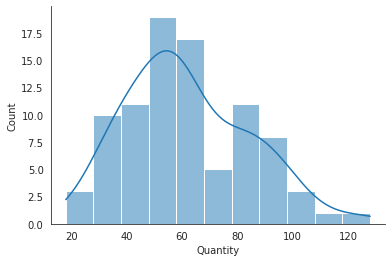

In [17]:
sns.set_style('white')

sns.histplot(data = sales_by_date, x = 'Quantity', binwidth = 10, kde = True)
sns.despine()

- From numbers finding out distribution is tough.
- so graph is used.
- Since Quantity values are many so, divided into bins and we need to find out the distribution of items on dates, - histplot

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

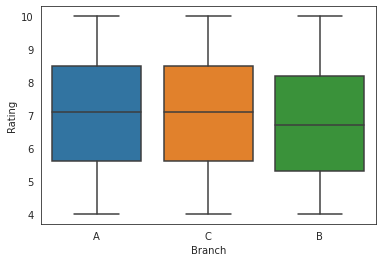

In [18]:
sns.boxplot(x = data.Branch, y = data.Rating)

- Comparing distributions can't be done in table.
- Need to compare the distributions and ranges of Ratings across the branches so Boxplot is used

In [53]:
def rating_level(rate):
    if rate >= 7.5:
        return 'positive'
    elif rate >= 6.5:
        return 'neutral'
    else:
        return 'negative' 
    

(array([413.,   0.,   0.,   0.,   0., 180.,   0.,   0.,   0., 407.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

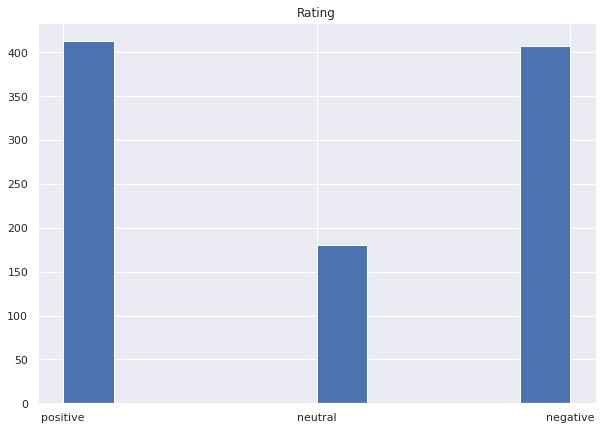

In [78]:
plt.figure(figsize = (10, 7))
plt.title("Rating")
plt.hist(x =data['Rating Level'])

- In this case looking up values are not necessary.
- Just looking at bars one can understand super market is getting more negative rating too.
- so chose histogram over table.

## Change over time

(0.0, 10.0)

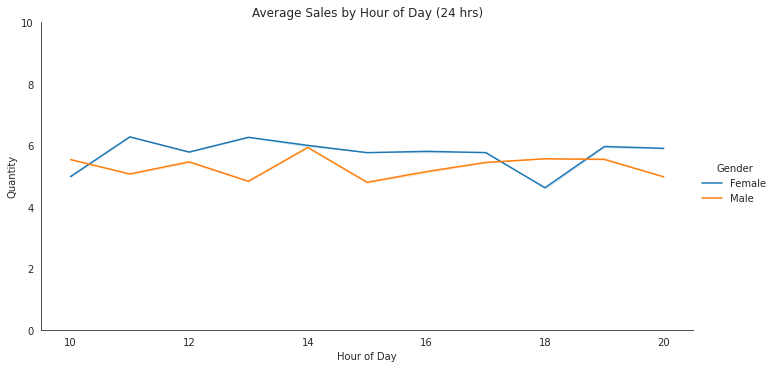

In [19]:
sns.relplot(kind = 'line', data = data, x ='hour', y = 'Quantity', aspect = 2, hue = 'Gender', ci = False)
plt.xlabel('Hour of Day')
plt.title('Average Sales by Hour of Day (24 hrs)')
plt.ylim(0,10)

- Trends and patterns can't be seen in tables.
- Line plots are used here to compare the shopping trend between two Gender categories with respect to hours.
- Females are shopping more compared to males most of the time(hours)

[Text(0.5, 1.0, 'sales at hours(time)')]

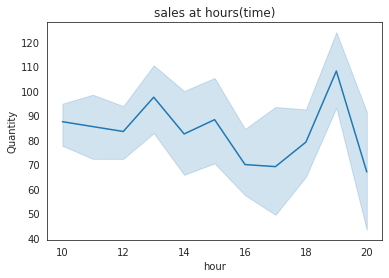

In [42]:
the_hours = data.groupby(by=['hour','Product line']).agg({'Quantity':np.sum})
sns.lineplot(data=the_hours.reset_index(),x='hour',y='Quantity').set(title= "sales at hours(time)")

- Since the inference lies in the shape of values (trend) line plot is used.
- Highest number of goods sold at 13 and 19 hours.
- Lowest number of goods sold at hours 16 and 17

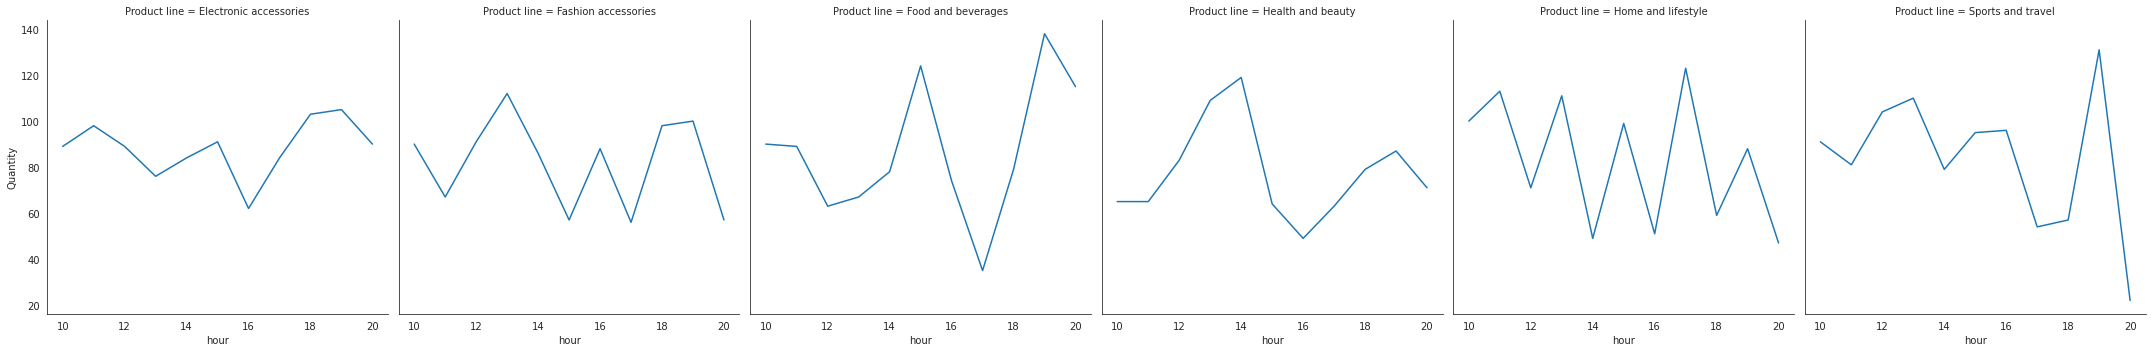

In [39]:
# sales at hours for each product line
sns.relplot(data=the_hours.reset_index(),x='hour',y='Quantity',col='Product line',kind='line')

## Relationship

<AxesSubplot:xlabel='Payment', ylabel='count'>

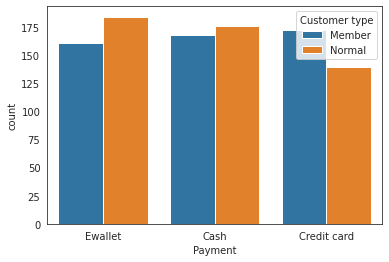

In [21]:
sns.countplot(x=data.Payment, hue = data['Customer type'])

- Need to check relation between Customer type and the payment methods used by them so grouped bar chat is used

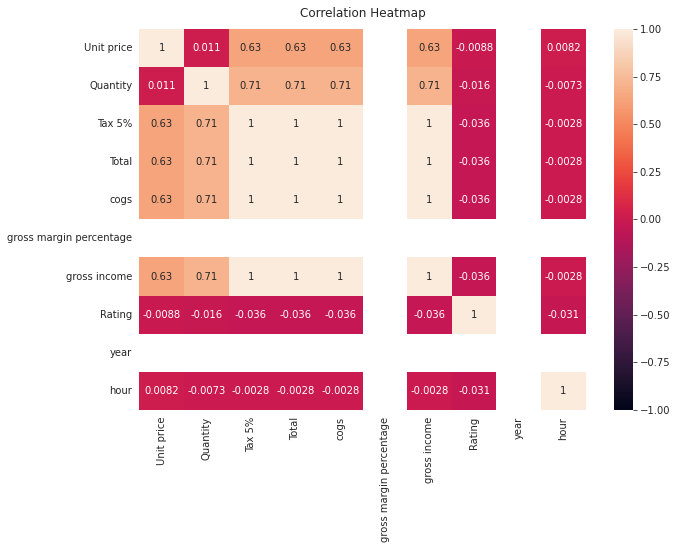

In [32]:
plt.figure(figsize = (10, 7))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

- Heat map shows Relationship between features in the dataset.
- understanding correlation in heatmap is easier compared to correlation values in tables if features are many.
- Positive Correlation :
1. Quantity = cogs, total, tax, gross income

2. Tax = Total, cogs, gross income, Quantity, unit price
3. Total = Tax, cogs, gross income, Quantity, unit price
4. cogs = Tax,gross income, Total, Quantity, unit price
5. gross income = Total, cogs,Tax, Quantity, unit price
- gross margin percentage is positively correlated to all variables

## Part to Whole

In [23]:
#Income per day
sales_income_per_day = data.groupby(['day'])['gross income'].sum()
sales_income_per_day

day
Friday       2091.7305
Monday       1804.7180
Saturday     2672.4195
Sunday       2117.0425
Thursday     2159.4880
Tuesday      2451.5355
Wednesday    2082.4350
Name: gross income, dtype: float64

Text(0.5, 1.0, 'Sales per day')

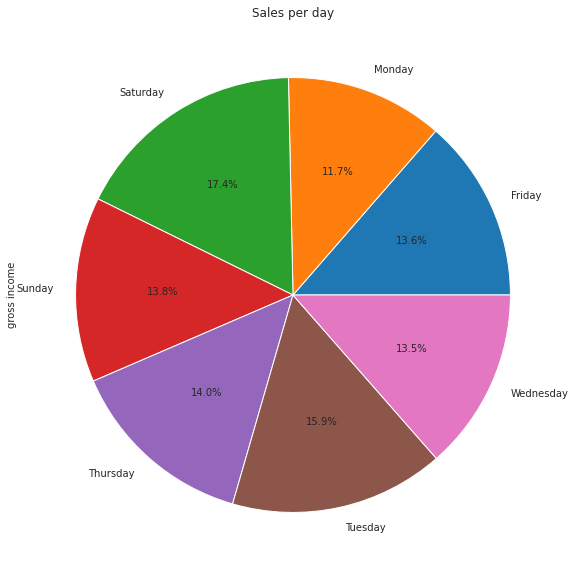

In [43]:
plt.figure(figsize=(14,10))
sales_income_per_day.plot(kind='pie', autopct='%1.1f%%').set_title('Sales per day')

- This is can be shown in table too but pie chart will give the viewer in ratio perception.
- so, when comparision needs to be done for less number of features pie chart will be useful.
- Here the percentages are similar so, percentages have to be shown.

In [25]:
#Income per hour
sales_income_hour = pd.DataFrame(data.groupby('hour')['gross income'].sum())
sales_income_hour

,gross income
hour,
10,1496.2610
11,1446.5395
12,1241.2325
13,1653.4870
14,1468.0190
15,1484.7385
16,1201.2535
17,1164.0580
18,1239.5400


In [26]:
#Income per branch
sales_file_branch_income = data.groupby('Branch')['gross income'].sum()
sales_file_branch_income

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64

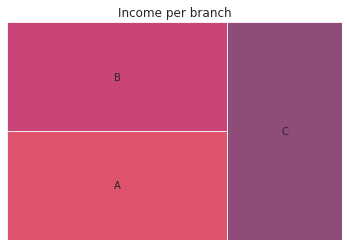

In [27]:
import squarify
squarify.plot(sizes=sales_file_branch_income.values, label=sales_file_branch_income.index, alpha=.8 ).set_title('Income per branch')
plt.axis('off')
plt.show()

- Tree plot is one of the plot in part-to-whole category.
- similar to pie chart this too speaks about ratios or percentages.
- all the divisions are almost equal.

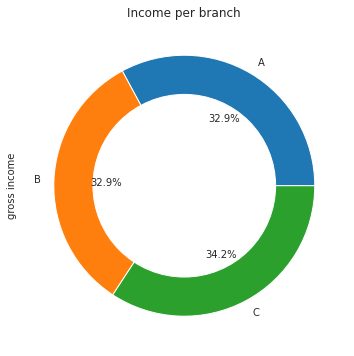

In [28]:
plt.figure(figsize=(10, 6))
sales_file_branch_income.plot(kind='pie',y='gross income',autopct='%1.1f%%').set_title('Income per branch')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

- Donut chart for the data used in the above tree plot.
- Here we are showing percentages too